In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import our input dataset
df = pd.read_csv('Data/ML_ready_data.csv')
df.head()

,id,season,neutral_site,home_team_x,home_conference,home_points,home_pregame_elo,away_team_x,away_conference,away_points,away_pregame_elo,spread,margin
0,400763593,2015,False,UCF,American Athletic,14,1626,Florida International,Conference USA,15,1321,-17.0,1
1,400603840,2015,True,South Carolina,SEC,17,1646,North Carolina,ACC,13,1477,-3.5,-4
2,400763399,2015,False,Central Michigan,Mid-American,13,1417,Oklahoma State,Big 12,24,1567,20.5,11
3,400603839,2015,False,Vanderbilt,SEC,12,1365,Western Kentucky,Conference USA,14,1521,-17.5,2
4,400756883,2015,False,Utah,Pac-12,24,1603,Michigan,Big Ten,17,1553,-3.0,-7


In [3]:
train_df = df.query("season != 2022")
test_df = df.query("season == 2022")

In [4]:
football_df = train_df.drop(["id","season","home_team_x","away_team_x","home_points","away_points"],axis=1).dropna()

football_df.head()

,neutral_site,home_conference,home_pregame_elo,away_conference,away_pregame_elo,spread,margin
0,False,American Athletic,1626,Conference USA,1321,-17.0,1
1,True,SEC,1646,ACC,1477,-3.5,-4
2,False,Mid-American,1417,Big 12,1567,20.5,11
3,False,SEC,1365,Conference USA,1521,-17.5,2
4,False,Pac-12,1603,Big Ten,1553,-3.0,-7


In [5]:
# Generate our categorical variable lists
football_cat = football_df.dtypes[football_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(football_df[football_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(football_cat)
encode_df.head()

,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,home_conference_FBS Independents,home_conference_Mid-American,home_conference_Mountain West,home_conference_Pac-12,home_conference_SEC,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Merge one-hot encoded features and drop the originals
merged_df = football_df.merge(encode_df,left_index=True, right_index=True)
merged_df = merged_df.drop(football_cat,axis=1)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,False,1626,1321,-17.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,1646,1477,-3.5,-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,1417,1567,20.5,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,1365,1521,-17.5,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,1603,1553,-3.0,-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Convert boolean values to int
merged_df["neutral_site"]=merged_df["neutral_site"].astype(int)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,0,1626,1321,-17.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1646,1477,-3.5,-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1417,1567,20.5,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1365,1521,-17.5,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1603,1553,-3.0,-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
merged_df.margin.value_counts()

-3     239
-7     217
 3     207
 7     188
-14    141
      ... 
-74      1
 61      1
-67      1
 58      1
 62      1
Name: margin, Length: 129, dtype: int64

In [9]:
merged_df.margin.describe()

count    4775.000000
mean       -3.956649
std        21.506539
min       -74.000000
25%       -18.000000
50%        -3.000000
75%         8.000000
max        78.000000
Name: margin, dtype: float64

(array([  15.,  147.,  435.,  965., 1296., 1157.,  530.,  185.,   40.,
           5.]),
 array([-74. , -58.8, -43.6, -28.4, -13.2,   2. ,  17.2,  32.4,  47.6,
         62.8,  78. ]),
 <BarContainer object of 10 artists>)

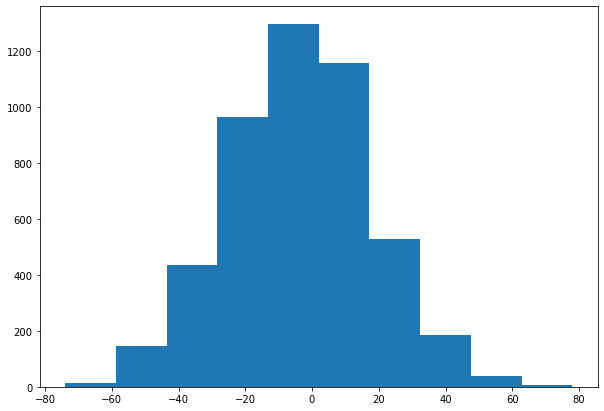

In [10]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(merged_df.margin)

In [11]:
mu = np.average(merged_df.margin)
sigma = np.std(merged_df.margin)
    
#Set boundaries
lowerb = mu - 2*sigma # Lower limit 
upperb = mu + 2*sigma # Upper limit
    
#update outliers to boundary limits
merged_df['margin']= merged_df['margin'].clip(lowerb, upperb)

(array([265., 304., 396., 644., 772., 812., 611., 393., 289., 289.]),
 array([-46.96522283, -38.36350811, -29.76179338, -21.16007866,
        -12.55836394,  -3.95664921,   4.64506551,  13.24678023,
         21.84849495,  30.45020968,  39.0519244 ]),
 <BarContainer object of 10 artists>)

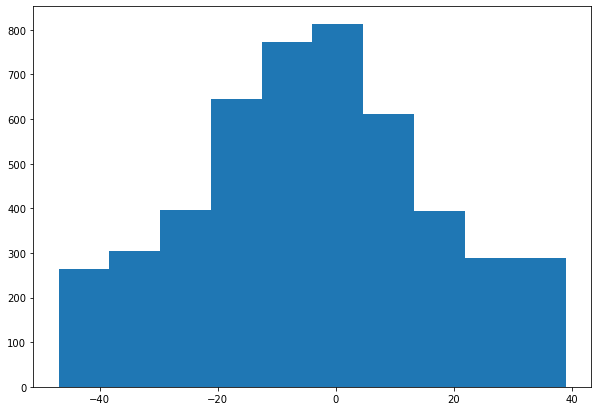

In [12]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(merged_df.margin)

In [13]:
# Split our preprocessed data into our features and target arrays
y = merged_df.margin.values
X = merged_df.drop(columns=["margin"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
print(y.shape, X.shape)

(4775,) (4775, 34)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128
#hidden_nodes_layer2 = 64

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4480      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,batch_size=128,epochs=20)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/20
25/25 [==============================] - 2s 4ms/step - loss: -4.9896 - accuracy: 0.0031
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: -17.2740 - accuracy: 9.3779e-04
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: -32.1782 - accuracy: 0.0016
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: -51.7616 - accuracy: 0.0016
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: -78.7096 - accuracy: 0.0019
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: -113.7985 - accuracy: 0.0022
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: -158.1794 - accuracy: 0.0025
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: -213.3037 - accuracy: 0.0025
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: -278.1996 - accuracy: 0.0031
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: -355.5602 - accuracy

<AxesSubplot:>

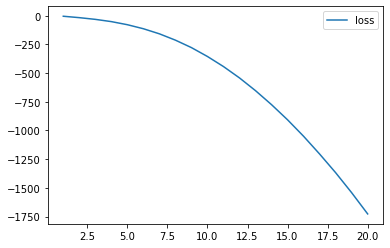

In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

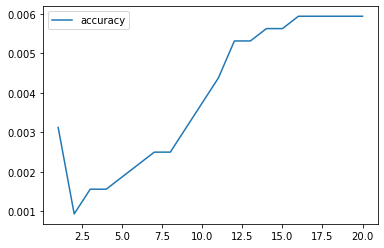

In [18]:
# Plot the accuracy
history_df.plot(y="accuracy")

# Predicting over entire dataset

In [25]:
X_predict = scaler.fit(X)
X_predict_scaled = X_predict.transform(X)
prediction = nn.predict(X_predict_scaled)
len(prediction)

150/150 [==============================] - 0s 3ms/step


4775

In [23]:
predict_df = pd.DataFrame([train_df.home_team_x,
                           train_df.home_points,
                           train_df.away_team_x,
                           train_df.away_points,
                           train_df.spread,
                           train_df.margin,
                           prediction]).transpose()
# predict_df.rename(columns = {"Unnamed 0":"Prediction"}, inplace = True)
# predict_df


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4775 and the array at index 6 has size 1

In [24]:
len(train_df.home_team_x)

4775

In [ ]:
plt.title('Feature Importances')

top_features = 20
features = X.columns
importances = nn.feature_importances_
index = numpy.argsort(importances)

plt.barh(range(top_features), importances[index[-top_features:]], color='b', align='center')
plt.yticks(range(top_features), [features[i] for i in index[-top_features:]])
plt.xlabel('Relative Importance')
plt.show()